In [1]:
# Import the needed files
import sys
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns   

In [6]:
path

'/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/predictions/../data/final_data.csv'

In [8]:
# Navigate one directory up from the current working directory and then into the 'data' directory
data_path = '../data/Final_data/'
file_name = 'final_data.csv'
file_path = os.path.join(data_path, file_name)


# Now 'absolute_path' can be used to access your file
data = pd.read_csv(file_path)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4439 entries, 0 to 4438
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             4439 non-null   object 
 1   Day_ahead_price                  4439 non-null   float64
 2   BEV_vehicles                     4439 non-null   int64  
 3   Biomass (GWh)                    4439 non-null   float64
 4   Hard Coal (GWh)                  4439 non-null   float64
 5   Hydro (GWh)                      4439 non-null   float64
 6   Lignite (GWh)                    4439 non-null   float64
 7   Natural Gas (GWh)                4439 non-null   float64
 8   Nuclear (GWh)                    4439 non-null   float64
 9   Oil_price (EUR)                  4439 non-null   float64
 10  Other (GWh)                      4439 non-null   float64
 11  Pumped storage generation (GWh)  4439 non-null   float64
 12  Solar (GWh)         

In [10]:
data

,date,Day_ahead_price,BEV_vehicles,Biomass (GWh),Hard Coal (GWh),Hydro (GWh),Lignite (GWh),Natural Gas (GWh),Nuclear (GWh),Oil_price (EUR),Other (GWh),Pumped storage generation (GWh),Solar (GWh),Solar_radiation,TTF_gas_price (EUR/MWh),Temperature,Wind offshore (GWh),Wind onshore (GWh),Wind_speed,net_total_export_import (GWh)
0,2012-01-01,18.1896,6,98.605,108.454,51.011,325.337,188.811,250.979,98.99,54.040,19.314,6.263,14.75,21.1000,8.39,3.404,235.467,4.95,54.662
1,2012-01-02,33.8188,6,98.605,222.656,51.862,343.168,229.293,258.671,99.39,54.166,28.892,6.312,15.12,20.0000,7.41,3.350,231.772,5.00,-64.477
2,2012-01-03,35.0263,6,98.605,162.204,48.851,336.773,241.297,271.495,99.79,53.518,21.072,24.226,31.88,20.9000,5.23,7.292,504.484,7.77,-35.078
3,2012-01-04,32.1633,6,98.605,189.633,47.101,323.976,252.289,270.613,102.48,52.194,28.300,14.157,25.21,21.4000,4.78,7.828,541.528,8.04,22.924
4,2012-01-05,20.3500,6,98.605,175.733,45.854,327.502,259.018,287.555,103.24,52.179,31.887,4.728,13.46,21.3000,4.23,8.280,572.819,9.98,35.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2024-02-25,61.0938,947,123.683,48.501,58.671,193.697,255.124,0.000,74.73,60.627,13.565,169.216,97.58,23.7625,4.52,29.879,278.787,3.43,-36.930
4435,2024-02-26,66.2683,947,124.810,69.146,58.444,281.177,289.764,0.000,74.60,59.810,12.231,110.504,73.25,23.9000,4.96,62.336,239.555,3.12,-198.686
4436,2024-02-27,73.8362,947,124.989,103.379,59.181,351.355,354.042,0.000,75.61,67.170,23.753,85.584,58.12,24.8300,4.53,16.951,131.761,3.11,-209.332
4437,2024-02-28,71.8213,947,125.068,93.416,58.160,350.348,338.216,0.000,76.07,65.375,19.042,106.330,66.00,24.8000,3.69,68.585,76.355,2.46,-206.956


In [12]:
# Set date as index
data.set_index('date', inplace=True)

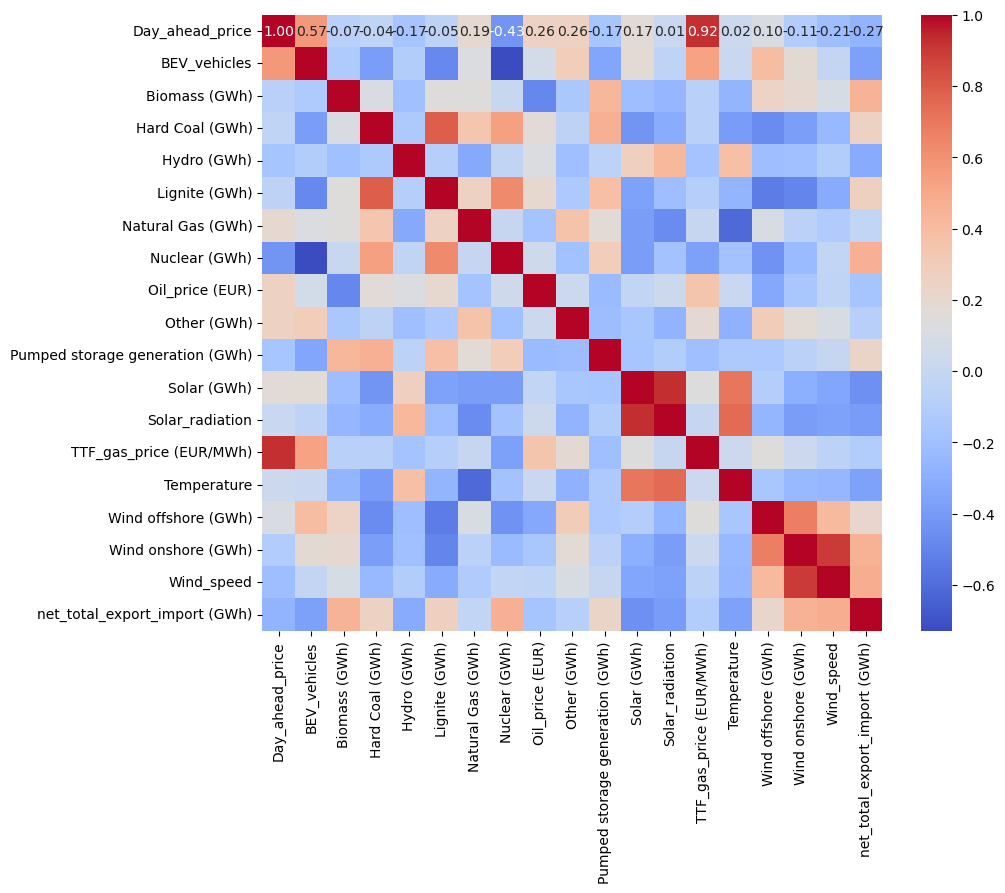

In [13]:
# Correlation matrix heatmap to understand the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Augmented Dickey-Fuller (ADF) test

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(data['Day_ahead_price'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation
if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: -3.6619251250521323
p-value: 0.004681727043597106
Critical Values:
	1%: -3.4318343720880873
	5%: -2.8621959125651086
	10%: -2.567119146381682
The time series is stationary.


## Decomposition


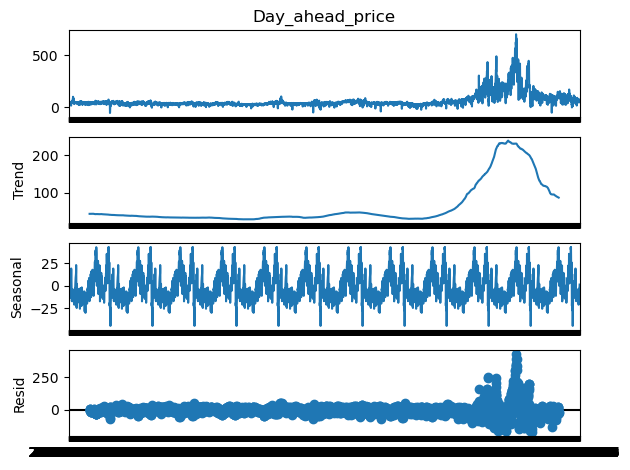

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Day_ahead_price'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()


## Autocorrelation analysis


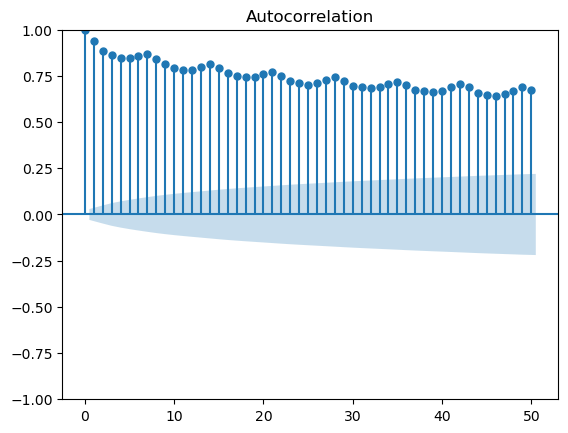

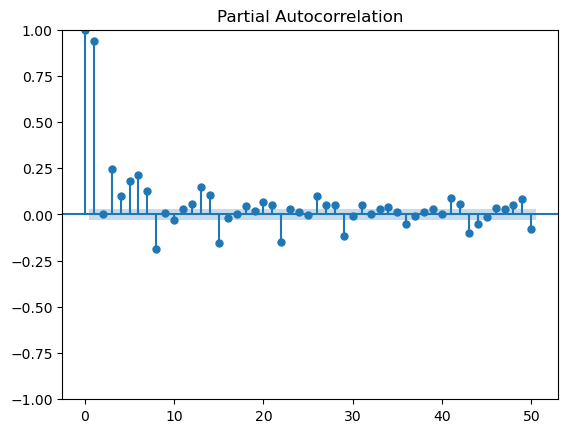

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Function (ACF) plot
plot_acf(data['Day_ahead_price'], lags=50)
plt.show()

# Partial Autocorrelation Function (PACF) plot
plot_pacf(data['Day_ahead_price'], lags=50)
plt.show()


## Fourier transform

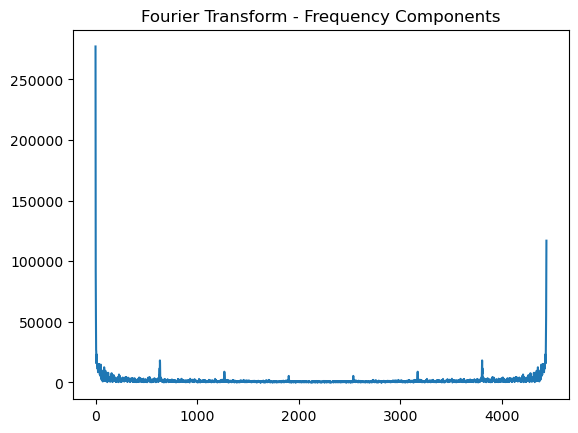

In [17]:
from numpy.fft import fft

# Compute the Fast Fourier Transform (FFT)
fft_results = fft(data['Day_ahead_price'])
frequencies = np.abs(fft_results)

plt.plot(frequencies)
plt.title('Fourier Transform - Frequency Components')
plt.show()


## Linear Regression

In [18]:
def train_test_split_sequential(X, y, test_size=0.2):
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test


In [19]:
import pandas as pd

# Let's create 3 lagged features for 'Day_ahead_price'
for lag in range(1, 4):
    data[f'Day_ahead_price_lag{lag}'] = data['Day_ahead_price'].shift(lag)

# Check the first few rows to see the lagged features
print(data.head())


            Day_ahead_price  BEV_vehicles  Biomass (GWh)  Hard Coal (GWh)  \
date                                                                        
2012-01-01          18.1896             6         98.605          108.454   
2012-01-02          33.8188             6         98.605          222.656   
2012-01-03          35.0263             6         98.605          162.204   
2012-01-04          32.1633             6         98.605          189.633   
2012-01-05          20.3500             6         98.605          175.733   

            Hydro (GWh)  Lignite (GWh)  Natural Gas (GWh)  Nuclear (GWh)  \
date                                                                       
2012-01-01       51.011        325.337            188.811        250.979   
2012-01-02       51.862        343.168            229.293        258.671   
2012-01-03       48.851        336.773            241.297        271.495   
2012-01-04       47.101        323.976            252.289        270.613   
2012

In [20]:
data.dropna(inplace=True)


In [21]:
# Assuming 'Day_ahead_price' is your target variable
X = data.drop(['Day_ahead_price'], axis=1)
y = data['Day_ahead_price']

# Proceed with train-test split, model training, and evaluation


Model Coefficients: [ 0.00766917 -0.03220656  0.02137947  0.00575115  0.02089593  0.05761738
  0.01277977 -0.03706736  0.12253889  0.23451796  0.02489989 -0.01917503
  0.8330024   0.5084189   0.04899436  0.00561991 -2.17950505 -0.04054758
  0.33484865 -0.04086425  0.09884342]
Intercept: -23.942915375070115
Mean Squared Error (MSE): 1987.3365081327895
Coefficient of Determination (R^2): 0.8424112614616273


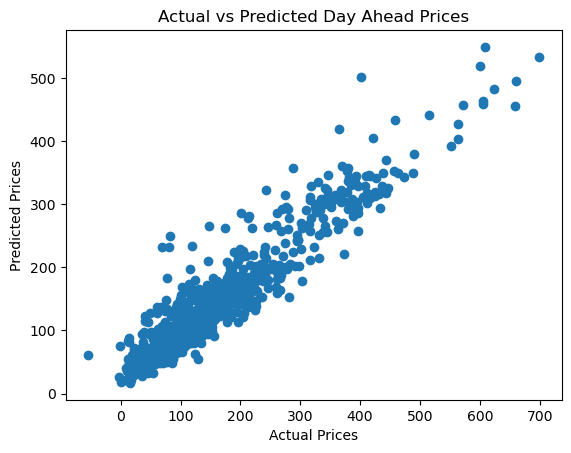

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have created lagged features and selected your predictors in X, and your target in y
X_train, X_test, y_train, y_test = train_test_split_sequential(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Day Ahead Prices")
plt.show()

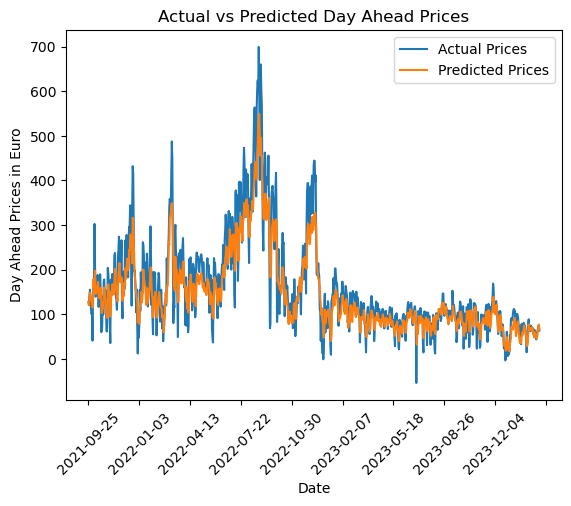

In [30]:
# Line plot of the predicted values and the original values over time, use index as date for x-axis, and 'Day_ahead_price' as y-axis
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.xlabel('Date')
# Show only the months in the date column
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.ylabel('Day Ahead Prices in Euro')
plt.title('Actual vs Predicted Day Ahead Prices')
plt.legend()

# save the plot
plt.savefig('actual_vs_predicted_prices.png')

# Prediction of future years using synthetic data set (Noch zu bearbeiten)


In [24]:
X

,BEV_vehicles,Biomass (GWh),Hard Coal (GWh),Hydro (GWh),Lignite (GWh),Natural Gas (GWh),Nuclear (GWh),Oil_price (EUR),Other (GWh),Pumped storage generation (GWh),...,Solar_radiation,TTF_gas_price (EUR/MWh),Temperature,Wind offshore (GWh),Wind onshore (GWh),Wind_speed,net_total_export_import (GWh),Day_ahead_price_lag1,Day_ahead_price_lag2,Day_ahead_price_lag3
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,6,98.605,189.633,47.101,323.976,252.289,270.613,102.48,52.194,28.300,...,25.21,21.4000,4.78,7.828,541.528,8.04,22.924,35.0263,33.8188,18.1896
2012-01-05,6,98.605,175.733,45.854,327.502,259.018,287.555,103.24,52.179,31.887,...,13.46,21.3000,4.23,8.280,572.819,9.98,35.618,32.1633,35.0263,33.8188
2012-01-06,6,98.605,191.795,51.217,358.621,274.310,293.222,103.18,52.051,28.857,...,25.17,21.4500,2.62,4.640,321.017,6.25,5.603,20.3500,32.1633,35.0263
2012-01-07,6,98.605,150.324,47.070,372.497,255.551,289.022,103.11,52.279,21.148,...,11.50,21.3300,3.50,5.768,399.006,6.53,27.657,36.2571,20.3500,32.1633
2012-01-08,6,98.605,189.718,48.467,354.178,256.892,286.206,103.04,52.178,16.006,...,17.54,21.3300,3.74,3.639,251.722,5.21,26.066,32.5758,36.2571,20.3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,947,123.683,48.501,58.671,193.697,255.124,0.000,74.73,60.627,13.565,...,97.58,23.7625,4.52,29.879,278.787,3.43,-36.930,57.1983,43.7371,50.9183
2024-02-26,947,124.810,69.146,58.444,281.177,289.764,0.000,74.60,59.810,12.231,...,73.25,23.9000,4.96,62.336,239.555,3.12,-198.686,61.0938,57.1983,43.7371
2024-02-27,947,124.989,103.379,59.181,351.355,354.042,0.000,75.61,67.170,23.753,...,58.12,24.8300,4.53,16.951,131.761,3.11,-209.332,66.2683,61.0938,57.1983


In [25]:
# Create a new DataFrame with the same columns as the original dataset
future_data = pd.DataFrame(columns=data.columns)

# Extract the last 30 days from your data
last_30_days = data.iloc[-30:]

# Concatenate this to the future_data DataFrame
future_data = pd.concat([future_data, last_30_days], ignore_index=True)

# If you intend to simulate missing 'Day_ahead_price' you can set it to NaN
future_data['Day_ahead_price'] = np.nan

# Now future_data contains the simulated data for the next 30 days with the 'Day_ahead_price' column set to NaN


/var/folders/8w/b_0gc01d70g6h4k62sb7ytyw0000gn/T/ipykernel_22553/724271110.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_data = pd.concat([future_data, last_30_days], ignore_index=True)


In [47]:
future_data

,Day_ahead_price,BEV_vehicles,Biomass (GWh),Hard Coal (GWh),Hydro (GWh),Lignite (GWh),Natural Gas (GWh),Nuclear (GWh),Oil price (EUR),Other (GWh),...,Solar (GWh),Solar_radiation,Temperature,Wind offshore (GWh),Wind onshore (GWh),Wind_speed,net_total_export_import (GWh),Day_ahead_price_lag1,Day_ahead_price_lag2,Day_ahead_price_lag3
0,NaN,754,120.345,133.345,63.229,226.120,277.641,0.0,75.77,69.508,...,50.594,35.00,5.07,116.694,473.857,4.21,-50.266,77.9671,81.0329,59.2783
1,NaN,947,121.137,131.814,62.691,184.138,281.525,0.0,72.97,73.164,...,73.104,42.62,5.37,90.985,632.072,5.29,47.505,76.0046,77.9671,81.0329
2,NaN,947,121.398,102.430,62.620,145.030,265.021,0.0,71.37,68.567,...,53.326,35.21,5.25,123.436,700.950,5.56,70.668,72.0358,76.0046,77.9671
3,NaN,947,121.821,89.531,57.040,92.716,218.240,0.0,71.30,64.134,...,57.007,35.33,7.57,127.305,789.179,6.21,224.568,61.6612,72.0358,76.0046
4,NaN,947,121.565,74.745,52.989,87.505,203.572,0.0,71.23,63.996,...,39.472,28.46,7.60,134.309,861.327,6.88,310.532,35.9704,61.6612,72.0358
5,NaN,947,120.440,101.931,51.810,92.916,251.802,0.0,71.16,64.702,...,94.065,46.96,8.15,108.787,975.387,7.67,314.064,14.7775,35.9704,61.6612
6,NaN,947,119.953,105.295,52.809,97.684,245.661,0.0,72.09,63.967,...,51.198,28.29,7.26,118.847,1019.391,8.02,289.332,35.8408,14.7775,35.9704
7,NaN,947,119.905,112.335,56.971,260.544,315.235,0.0,72.89,65.341,...,49.950,33.58,5.06,102.259,489.462,6.01,27.783,45.2929,35.8408,14.7775
8,NaN,947,119.338,157.167,61.343,337.050,377.046,0.0,73.39,77.638,...,43.053,32.67,4.61,46.811,214.002,3.56,-112.418,79.1596,45.2929,35.8408
9,NaN,947,119.951,70.674,56.398,257.005,278.172,0.0,75.42,75.867,...,42.053,29.25,7.46,141.127,481.475,4.53,-19.523,88.6958,79.1596,45.2929


In [26]:
X_future = X[-30:]
y_future = model.predict(X_future)
# Print the predicted prices for the next 30 days
print(y_future)

[69.54484963 66.58568041 60.12464151 47.21647808 31.25480604 28.67897244
 32.88946381 51.72753945 77.28986594 70.64197257 68.39811868 64.53579338
 68.76482438 69.8858761  64.0481235  71.08053597 65.98089921 60.83815771
 53.82993497 48.20413168 60.29646561 56.01388737 51.63136914 47.0288101
 46.34359714 51.18359477 62.99461754 73.21529046 76.87899409 65.89486525]


In [27]:
# %%
print("Current Working Directory:", os.getcwd())

# %%
# Assuming 'data' directory is at the same level as your notebook
data_path = '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/EEX_stock/storage/final_data_eex/'
file_name = 'eex_stock_prices_2006_2024.csv'
file_path = os.path.join(data_path, file_name)

# Function to import data
def import_data(file_path, index_col):
    data = pd.read_csv(file_path, sep=',')
    return data


# Import the data
stock_data = import_data(file_path, 0)

Current Working Directory: /Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/predictions


In [28]:
# Take only the values of March 2024 of the stock_data
stock_data = stock_data[stock_data['Date'].str.contains('2024-03')]
stock_data

# make date the index
stock_data.set_index('Date', inplace=True)

# convert array to dataframe
y_future_df = pd.DataFrame(y_future, columns=['Predicted Prices'])

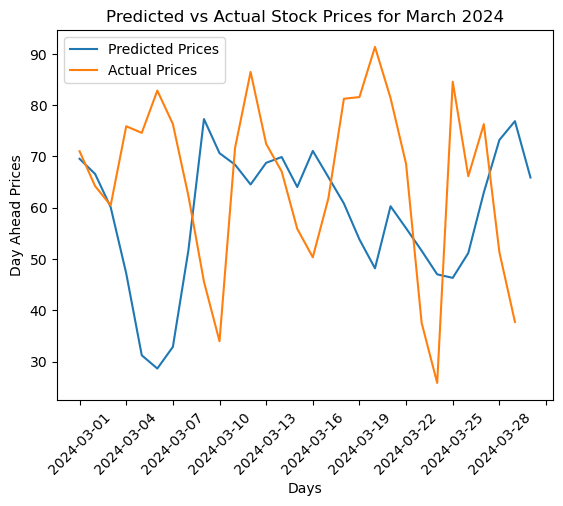

In [29]:
# compare stock_data prices with the predicted prices for the 30 days
plt.plot(y_future_df, label='Predicted Prices')
plt.plot(stock_data['Day Ahead Auktion (arithmetisch)'], label='Actual Prices')
plt.xlabel('Days')
plt.ylabel('Day Ahead Prices')
plt.title('Predicted vs Actual Stock Prices for March 2024')
# Show only the months in the date column
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.legend()
plt.show()
